# Loading the data

In [144]:
import pandas as pd
import numpy as np
import os

# Define the file path and the years to process
base_path = r'/Users/carter/Library/CloudStorage/OneDrive-UniversityofMaryland/Capstone/Sample'
years = range(2000, 2019)  # 2000 to 2018

# Initialize a list to hold the transformed DataFrames
all_data = []

# Define the column headers (as provided earlier)
headers = [
    "LOAN_SEQUENCE_NUMBER", "MONTHLY_REPORTING_PERIOD", "CURRENT_ACTUAL_UPB", "CURRENT_LOAN_DELINQUENCY_STATUS",
    "LOAN_AGE", "REMAINING_MONTHS_TO_LEGAL_MATURITY", "DEFECT_SETTLEMENT_DATE", "MODIFICATION_FLAG",
    "ZERO_BALANCE_CODE", "ZERO_BALANCE_EFFECTIVE_DATE", "CURRENT_INTEREST_RATE", "CURRENT_NON-INTEREST_BEARING_UPB",
    "DUE_DATE_OF_LAST_PAID_INSTALLMENT(DDLPI)", "MI_RECOVERIES", "NET_SALE_PROCEEDS", "NON_MI_RECOVERIES",
    "TOTAL_EXPENSES", "LEGAL_COSTS", "MAINTENANCE_AND_PRESERVATION_COSTS", "TAXES_AND_INSURANCE",
    "MISCELLANEOUS_EXPENSES", "ACTUAL_LOSS_CALCULATION", "CUMULATIVE_MODIFICATION_COST", "STEP_MODIFICATION_FLAG",
    "PAYMENT_DEFERRAL", "ESTIMATED_LOAN_TO_VALUE(ELTV)", "ZERO_BALANCE_REMOVAL_UPB", "DELINQUENT_ACCRUED_INTEREST",
    "DELINQUENCY_DUE_TO_DISASTER", "BORROWER_ASSISTANCE_STATUS_CODE", "CURRENT_MONTH_MODIFICATION_COST",
    "INTEREST_BEARING_UPB"
]

# Function to reclassify the values
def reclassify_status(value):
    if value.isdigit():  # Check if the value is numeric
        numeric_value = int(value)
        if numeric_value > 3:
            return '3'  # Reclassify to '3' if greater than 3
        else:
            return str(numeric_value)  # Retain 0, 1, 2, 3 as strings
    elif value == 'RA' or pd.isna(value):  # Retain 'RA' and NaN
        return value
    else:
        return value  # For any other unexpected string, retain as is


# Loop through each year, process the file, and transform the data
for year in years:
    file_path = os.path.join(base_path, f'sample_svcg_{year}.txt')
    
    # Load the data
    df = pd.read_csv(file_path, header=None, delimiter="|")
    df.columns = headers  # Assign column headers

    # Data cleaning and transformation
    df['LOAN_SEQUENCE_NUMBER'] = df['LOAN_SEQUENCE_NUMBER'].astype(str)
    df = df[df['LOAN_SEQUENCE_NUMBER'].notna()]

    # Convert MONTHLY_REPORTING_PERIOD to datetime
    df['MONTHLY_REPORTING_PERIOD'] = pd.to_datetime(df['MONTHLY_REPORTING_PERIOD'], format='%Y%m', errors='coerce')

    # Replace CURRENT_LOAN_DELINQUENCY_STATUS with readable values
    df['CURRENT_LOAN_DELINQUENCY_STATUS'] = df['CURRENT_LOAN_DELINQUENCY_STATUS'].astype(str)
    df['CURRENT_LOAN_DELINQUENCY_STATUS'] = df['CURRENT_LOAN_DELINQUENCY_STATUS'].apply(reclassify_status)

    # Pivot the data
    df_transformed = df.pivot(
        index='LOAN_SEQUENCE_NUMBER',
        columns='MONTHLY_REPORTING_PERIOD',
        values='CURRENT_LOAN_DELINQUENCY_STATUS'
    )

    # Reset the index and clean up column names
    df_transformed = df_transformed.reset_index()
    df_transformed.columns = [
        col.strftime('%m/%d/%Y') if isinstance(col, pd.Timestamp) else col
        for col in df_transformed.columns
    ]

    # Append the transformed DataFrame to the list
    all_data.append(df_transformed)

# Concatenate all the transformed DataFrames
final_df = pd.concat(all_data, ignore_index=True)

/var/folders/hg/9mc5r2n140394zv82968b4v40000gn/T/ipykernel_76915/1312317672.py:44: DtypeWarning: Columns (3,7,23,24,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, delimiter="|")
/var/folders/hg/9mc5r2n140394zv82968b4v40000gn/T/ipykernel_76915/1312317672.py:44: DtypeWarning: Columns (3,7,23,24,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, delimiter="|")
/var/folders/hg/9mc5r2n140394zv82968b4v40000gn/T/ipykernel_76915/1312317672.py:44: DtypeWarning: Columns (3,7,23,24,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, delimiter="|")
/var/folders/hg/9mc5r2n140394zv82968b4v40000gn/T/ipykernel_76915/1312317672.py:44: DtypeWarning: Columns (3,7,23,24,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=N

In [145]:
final_df

,LOAN_SEQUENCE_NUMBER,02/01/2000,03/01/2000,04/01/2000,05/01/2000,06/01/2000,07/01/2000,08/01/2000,09/01/2000,10/01/2000,...,09/01/2023,10/01/2023,11/01/2023,12/01/2023,01/01/2024,02/01/2024,03/01/2024,04/01/2024,05/01/2024,06/01/2024
0,F00Q10000035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F00Q10000049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F00Q10000054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F00Q10000091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F00Q10000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949995,F18Q40289783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
949996,F18Q40289795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
949997,F18Q40289813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
949998,F18Q40289818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# Remove rows where all delinquency statuses are '0' for all reporting periods
# Exclude the 'LOAN_SEQUENCE_NUMBER' column from the check
final_df = final_df.loc[~(final_df.iloc[:, 1:].fillna('0') == '0').all(axis=1)]

# Reset the index after removing rows
final_df.reset_index(drop=True, inplace=True)


# Data Transformation

In [147]:
# Function to track delinquency status changes and create a new DataFrame
def track_delinquency_status(row):
    # Extract loan sequence number
    loan_sequence = row['LOAN_SEQUENCE_NUMBER']
    
    # Extract delinquency statuses for all reporting periods
    statuses = row.iloc[1:]  # Exclude 'LOAN_SEQUENCE_NUMBER'
    
    # Find the index where the status changes from '0' to '1'
    for i, status in enumerate(statuses):
        if status == '1' and (i == 0 or statuses.iloc[i - 1] == '0'):
            # Found the start of a delinquency period
            start_index = i
            break
    else:
        return None  # Return None if no change from 0 to 1 is found
    
    # Slice the next 13 statuses (including the start of delinquency)
    delinquency_period = statuses.iloc[start_index:start_index + 13].tolist()
    
    # If fewer than 13 months remain, pad with None
    delinquency_period += [None] * (13 - len(delinquency_period))
    
    # Return a dictionary for the new row
    return {'LOAN_SEQUENCE_NUMBER': loan_sequence, **{f'Month {i+1}': status for i, status in enumerate(delinquency_period)}}

# Apply the function to each row
transformed_data = final_df.apply(track_delinquency_status, axis=1)

# Filter out None values and create a new DataFrame
transformed_data = pd.DataFrame([row for row in transformed_data if row is not None])

# Reset the index for the final transformed data
transformed_data.reset_index(drop=True, inplace=True)

# Display the transformed data
transformed_data.head(10)


,LOAN_SEQUENCE_NUMBER,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Month 13
0,F00Q10000116,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,F00Q10000238,1,0,0,0,0,0,0,0,0,0,0,0,0
2,F00Q10000355,1,2,3,3,3,3,3,3,3,RA,RA,NaN,NaN
3,F00Q10000736,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F00Q10000821,1,0,0,0,0,0,0,0,0,0,0,0,0
5,F00Q10000881,1,0,0,0,0,0,0,0,0,0,0,0,0
6,F00Q10000960,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7,F00Q10001301,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,F00Q10001559,1,0,0,0,0,0,1,0,0,1,1,2,0
9,F00Q10002989,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# Replace 'RA' values with '4' in the delinquency status columns
delinquency_columns = [col for col in transformed_data.columns if col.startswith('Month')]
transformed_data[delinquency_columns] = transformed_data[delinquency_columns].replace('RA', '4')

# Display the updated DataFrame
transformed_data


,LOAN_SEQUENCE_NUMBER,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Month 13
0,F00Q10000116,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,F00Q10000238,1,0,0,0,0,0,0,0,0,0,0,0,0
2,F00Q10000355,1,2,3,3,3,3,3,3,3,4,4,NaN,NaN
3,F00Q10000736,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F00Q10000821,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143634,F18Q40288801,1,0,0,0,0,0,0,0,0,0,0,0,0
143635,F18Q40288940,1,2,3,0,0,0,0,0,1,0,1,2,3
143636,F18Q40289193,1,0,0,0,0,0,0,0,0,0,0,0,0
143637,F18Q40289302,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [149]:
# Count rows with NA in 'Month 13'
na_count = transformed_data['Month 13'].isna().sum()
print(f"Number of rows with NA in 'Month 13': {na_count}")

Number of rows with NA in 'Month 13': 26753


In [150]:
# Remove rows with NA in 'Month 13'
transformed_data = transformed_data[~transformed_data['Month 13'].isna()]

# Reset the index after removing rows
transformed_data.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
transformed_data

,LOAN_SEQUENCE_NUMBER,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Month 13
0,F00Q10000238,1,0,0,0,0,0,0,0,0,0,0,0,0
1,F00Q10000821,1,0,0,0,0,0,0,0,0,0,0,0,0
2,F00Q10000881,1,0,0,0,0,0,0,0,0,0,0,0,0
3,F00Q10001559,1,0,0,0,0,0,1,0,0,1,1,2,0
4,F00Q10003972,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116881,F18Q40288503,1,0,0,0,0,0,0,0,0,0,0,0,0
116882,F18Q40288801,1,0,0,0,0,0,0,0,0,0,0,0,0
116883,F18Q40288940,1,2,3,0,0,0,0,0,1,0,1,2,3
116884,F18Q40289193,1,0,0,0,0,0,0,0,0,0,0,0,0


# Loading Histroical Data

In [151]:
df_sample = pd.read_excel('/Users/carter/Library/CloudStorage/OneDrive-UniversityofMaryland/Capstone/Cleaned_FL_sample_2000_to_2018.xlsx')

In [152]:
df_sample

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area (MSA) Or Metropolitan Division,Mortgage Insurance Percentage (MI %),Number of Units,Occupancy Status,Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,...,HARP Indicator,Property Valuation Method,Interest Only (I/O) Indicator,Mortgage Insurance Cancellation Indicator,First Payment Year,First Payment Month,Maturity Year,Maturity Month,Metro Name,Part of MSA
0,733,2000-03-01,N,2030-02-01,0,0,1,P,80,32,...,N,9,N,9,2000,3,2030,2,Other,N
1,739,2002-01-01,N,2031-12-01,0,0,1,P,80,41,...,N,9,N,9,2002,1,2031,12,Other,N
2,747,2004-08-01,N,2034-07-01,0,0,1,P,80,33,...,N,9,N,9,2004,8,2034,7,Other,N
3,772,2010-08-01,N,2040-07-01,0,0,1,P,80,29,...,N,9,N,9,2010,8,2040,7,Other,N
4,812,2010-10-01,N,2040-09-01,0,0,1,P,80,37,...,N,9,N,9,2010,10,2040,9,Other,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54890,749,2019-02-01,Y,2049-01-01,36740,35,1,P,97,43,...,N,2,N,N,2019,2,2049,1,Orlando-Kissimmee-Sanford,Y
54891,772,2019-11-01,N,2029-10-01,0,0,1,P,61,22,...,N,2,N,7,2019,11,2029,10,Other,N
54892,761,2019-09-01,N,2049-08-01,15980,12,1,P,26,41,...,N,2,N,N,2019,9,2049,8,Cape Coral-Fort Myers,Y
54893,780,2019-12-01,N,2049-11-01,45300,25,1,P,88,22,...,N,2,N,N,2019,12,2049,11,Tampa-St. Petersburg-Clearwater,Y


In [153]:
# Ensure LOAN_SEQUENCE_NUMBER is of the same type in both DataFrames
transformed_data['LOAN_SEQUENCE_NUMBER'] = transformed_data['LOAN_SEQUENCE_NUMBER'].astype(str)
df_sample['Loan Sequence Number'] = df_sample['Loan Sequence Number'].astype(str)

# Find the intersection of LOAN_SEQUENCE_NUMBER in both DataFrames
matching_count = len(set(transformed_data['LOAN_SEQUENCE_NUMBER']) & set(df_sample['Loan Sequence Number']))
total_transformed = transformed_data['LOAN_SEQUENCE_NUMBER'].nunique()
total_sample = df_sample['Loan Sequence Number'].nunique()

# Print the results
print(f"Number of matching LOAN_SEQUENCE_NUMBER: {matching_count}")
print(f"Total LOAN_SEQUENCE_NUMBER in transformed_data: {total_transformed}")
print(f"Total Loan Sequence Number in df_sample: {total_sample}")


Number of matching LOAN_SEQUENCE_NUMBER: 9948
Total LOAN_SEQUENCE_NUMBER in transformed_data: 116886
Total Loan Sequence Number in df_sample: 54895


/var/folders/hg/9mc5r2n140394zv82968b4v40000gn/T/ipykernel_76915/248970434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['LOAN_SEQUENCE_NUMBER'] = transformed_data['LOAN_SEQUENCE_NUMBER'].astype(str)


# Data Merging

In [154]:
# Ensure LOAN_SEQUENCE_NUMBER exists in both DataFrames and is of the same type
transformed_data['LOAN_SEQUENCE_NUMBER'] = transformed_data['LOAN_SEQUENCE_NUMBER'].astype(str)
df_sample['Loan Sequence Number'] = df_sample['Loan Sequence Number'].astype(str)

# Merge the transformed data with the historical data
merged_data = pd.merge(
    transformed_data, 
    df_sample,
    left_on='LOAN_SEQUENCE_NUMBER', 
    right_on='Loan Sequence Number', 
    how='inner'  # Use 'inner' to keep only matching rows, change to 'left' if you want all from transformed_data
)

# Display the merged DataFrame
merged_data


/var/folders/hg/9mc5r2n140394zv82968b4v40000gn/T/ipykernel_76915/4127248086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['LOAN_SEQUENCE_NUMBER'] = transformed_data['LOAN_SEQUENCE_NUMBER'].astype(str)


,LOAN_SEQUENCE_NUMBER,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,...,HARP Indicator,Property Valuation Method,Interest Only (I/O) Indicator,Mortgage Insurance Cancellation Indicator,First Payment Year,First Payment Month,Maturity Year,Maturity Month,Metro Name,Part of MSA
0,F00Q10003972,1,0,0,0,0,0,0,0,0,...,N,9,N,9,2000,3,2030,2,Other,N
1,F00Q10004837,1,0,0,0,0,0,0,0,0,...,N,9,N,9,2000,4,2030,3,Other,N
2,F00Q10006228,1,0,0,0,0,0,0,0,0,...,N,9,N,9,2000,5,2015,4,Other,N
3,F00Q10008720,1,1,0,0,0,0,0,0,0,...,N,9,N,9,2000,4,2030,3,Cape Coral-Fort Myers,Y
4,F00Q10009074,1,0,1,2,2,3,3,3,3,...,N,9,N,9,2000,3,2030,2,Other,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,F18Q40277001,1,2,3,3,3,3,3,0,0,...,N,2,N,N,2019,2,2049,1,Tampa-St. Petersburg-Clearwater,Y
9944,F18Q40283513,1,1,0,0,0,0,0,0,0,...,N,2,N,N,2019,2,2049,1,Orlando-Kissimmee-Sanford,Y
9945,F18Q40284722,1,0,0,0,0,0,0,0,0,...,N,2,N,7,2018,12,2048,11,North Port-Bradenton-Sarasota,Y
9946,F18Q40285606,1,2,3,3,3,3,3,3,3,...,N,2,N,7,2019,2,2049,1,Other,N


In [155]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9948 entries, 0 to 9947
Data columns (total 52 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   LOAN_SEQUENCE_NUMBER                                          9948 non-null   object        
 1   Month 1                                                       9948 non-null   object        
 2   Month 2                                                       9948 non-null   object        
 3   Month 3                                                       9948 non-null   object        
 4   Month 4                                                       9948 non-null   object        
 5   Month 5                                                       9948 non-null   object        
 6   Month 6                                                       9948 non-null   object        
 7   Month 

In [156]:
# Drop columns with data type 'Timestamp'
merged_data = merged_data.loc[:, ~merged_data.dtypes.apply(lambda x: np.issubdtype(x, np.datetime64))]

# Display the updated DataFrame
print(f"Columns after dropping timestamp columns: {merged_data.columns}")

Columns after dropping timestamp columns: Index(['LOAN_SEQUENCE_NUMBER', 'Month 1', 'Month 2', 'Month 3', 'Month 4',
       'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Month 10',
       'Month 11', 'Month 12', 'Month 13', 'Credit Score',
       'First Time Homebuyer Flag',
       'Metropolitan Statistical Area (MSA) Or Metropolitan Division',
       'Mortgage Insurance Percentage (MI %)', 'Number of Units',
       'Occupancy Status', 'Original Combined Loan-to-Value (CLTV)',
       'Original Debt-to-Income (DTI) Ratio', 'Original UPB',
       'Original Loan-to-Value (LTV)', 'Original Interest Rate', 'Channel',
       'Prepayment Penalty Mortgage (PPM) Flag',
       'Amortization Type (Formerly Product Type)', 'Property State',
       'Property Type', 'Postal Code', 'Loan Sequence Number', 'Loan Purpose',
       'Original Loan Term', 'Number of Borrowers', 'Seller Name',
       'Servicer Name', 'Super Conforming Flag',
       'Pre-HARP Loan Sequence Number', 'Program Indicat

In [210]:
# Export merged_data to a CSV file
output_path = "/Users/carter/Library/CloudStorage/OneDrive-UniversityofMaryland/Capstone/merged_data.csv"  # Specify your desired file name and path
merged_data.to_csv(output_path, index=False)

print(f"merged_data has been successfully exported to {output_path}")



merged_data has been successfully exported to /Users/carter/Library/CloudStorage/OneDrive-UniversityofMaryland/Capstone/merged_data.csv


In [209]:
# List of columns to drop
columns_to_drop = [
    'First Payment Date', 
    'Maturity Date', 
    'Metropolitan Statistical Area (MSA) Or Metropolitan Division'
]

# Drop the columns from the DataFrame
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame
print(f"Columns after dropping specified columns: {merged_data.columns.tolist()}")


Columns after dropping specified columns: ['LOAN_SEQUENCE_NUMBER', 'Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12', 'Month 13', 'Credit Score', 'First Time Homebuyer Flag', 'Mortgage Insurance Percentage (MI %)', 'Number of Units', 'Original Combined Loan-to-Value (CLTV)', 'Original Debt-to-Income (DTI) Ratio', 'Original UPB', 'Original Loan-to-Value (LTV)', 'Original Interest Rate', 'Postal Code', 'Original Loan Term', 'Number of Borrowers', 'Property Valuation Method', 'First Payment Year', 'First Payment Month', 'Maturity Year', 'Maturity Month', 'Part of MSA']


In [158]:
# Map 'Yes' to 1 and 'No' to 0 in the 'First Time Homebuyer Flag' column
merged_data['First Time Homebuyer Flag'] = merged_data['First Time Homebuyer Flag'].map({'Y': 1, 'N': 0})

# Display the first few rows to verify the changes
print(merged_data[['First Time Homebuyer Flag']].head())


   First Time Homebuyer Flag
0                        1.0
1                        0.0
2                        0.0
3                        0.0
4                        0.0


In [159]:
# Map 'Y' to 1 and 'N' to 0 in the 'Part of MSA' column
merged_data['Part of MSA'] = merged_data['Part of MSA'].map({'Y': 1, 'N': 0})

# Display the first few rows to verify the changes
print(merged_data[['Part of MSA']].head())


   Part of MSA
0            0
1            0
2            0
3            1
4            0


In [160]:
# Ensure delinquency columns are converted to integers
merged_data[delinquency_columns] = merged_data[delinquency_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Verify the data type conversion
print(merged_data[delinquency_columns].dtypes)


Month 1     Int64
Month 2     Int64
Month 3     Int64
Month 4     Int64
Month 5     Int64
Month 6     Int64
Month 7     Int64
Month 8     Int64
Month 9     Int64
Month 10    Int64
Month 11    Int64
Month 12    Int64
Month 13    Int64
dtype: object


In [161]:
# Specify the column to retain
retain_column = 'LOAN_SEQUENCE_NUMBER'

# Remove object columns but retain 'Loan Sequence Number'
merged_data = merged_data.loc[:, (merged_data.dtypes != 'object') | (merged_data.columns == retain_column)]

# Display the remaining columns
print(f"Columns after removing object data type (except '{retain_column}'): {merged_data.columns.tolist()}")


Columns after removing object data type (except 'LOAN_SEQUENCE_NUMBER'): ['LOAN_SEQUENCE_NUMBER', 'Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12', 'Month 13', 'Credit Score', 'First Time Homebuyer Flag', 'Mortgage Insurance Percentage (MI %)', 'Number of Units', 'Original Combined Loan-to-Value (CLTV)', 'Original Debt-to-Income (DTI) Ratio', 'Original UPB', 'Original Loan-to-Value (LTV)', 'Original Interest Rate', 'Postal Code', 'Original Loan Term', 'Number of Borrowers', 'Property Valuation Method', 'First Payment Year', 'First Payment Month', 'Maturity Year', 'Maturity Month', 'Part of MSA']


In [168]:
# Count NA values in each column
na_counts = merged_data.isna().sum()

# Display the counts
print("Count of NA values in each column:")
print(na_counts)


Count of NA values in each column:
LOAN_SEQUENCE_NUMBER                      0
Month 1                                   0
Month 2                                   0
Month 3                                   0
Month 4                                   0
Month 5                                   0
Month 6                                   0
Month 7                                   0
Month 8                                   0
Month 9                                   0
Month 10                                  0
Month 11                                  0
Month 12                                  0
Month 13                                  0
Credit Score                              0
First Time Homebuyer Flag                 0
Mortgage Insurance Percentage (MI %)      0
Number of Units                           0
Original Combined Loan-to-Value (CLTV)    0
Original Debt-to-Income (DTI) Ratio       0
Original UPB                              0
Original Loan-to-Value (LTV)             

In [166]:
# Remove rows with NA in 'First Time Homebuyer Flag'
merged_data = merged_data[merged_data['First Time Homebuyer Flag'].notna()]

# Reset the index after removal
merged_data.reset_index(drop=True, inplace=True)

# Display the updated DataFrame and the new shape
print(f"Shape of the DataFrame after removing rows: {merged_data.shape}")


Shape of the DataFrame after removing rows: (9941, 32)


In [167]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9941 entries, 0 to 9940
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LOAN_SEQUENCE_NUMBER                    9941 non-null   object 
 1   Month 1                                 9941 non-null   Int64  
 2   Month 2                                 9941 non-null   Int64  
 3   Month 3                                 9941 non-null   Int64  
 4   Month 4                                 9941 non-null   Int64  
 5   Month 5                                 9941 non-null   Int64  
 6   Month 6                                 9941 non-null   Int64  
 7   Month 7                                 9941 non-null   Int64  
 8   Month 8                                 9941 non-null   Int64  
 9   Month 9                                 9941 non-null   Int64  
 10  Month 10                                9941 non-null   Int6

# Modelling for 70/30 Split

In [169]:
from sklearn.model_selection import train_test_split

# Ensure 'Month 13' is the target column
target_column = 'Month 13'

# Separate features (X) and target variable (y)
X = merged_data.drop(columns=[target_column, 'LOAN_SEQUENCE_NUMBER'])  # Drop target and ID columns
y = merged_data[target_column]  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (6958, 30)
X_test shape: (2983, 30)
y_train shape: (6958,)
y_test shape: (2983,)


In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Make predictions on new data
# Uncomment the following lines if you have new data to predict
# new_data = ...  # Replace with your new data in the same format as X
# new_predictions = rf_model.predict(new_data)
# print("Predictions:", new_predictions)


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1972
         1.0       0.57      0.33      0.41       199
         2.0       0.40      0.13      0.19        78
         3.0       0.92      0.98      0.95       715
         4.0       1.00      0.58      0.73        19

    accuracy                           0.91      2983
   macro avg       0.76      0.60      0.65      2983
weighted avg       0.89      0.91      0.89      2983



In [171]:
# Count the occurrences of each predicted value
predicted_counts = pd.Series(y_pred).value_counts()

# Display the counts
print("Count of Predicted Values:")
print(predicted_counts)


Count of Predicted Values:
0.0    2065
3.0     767
1.0     115
2.0      25
4.0      11
Name: count, dtype: int64


# Modelling for Entire Dataset

In [176]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Ensure the dataset (merged_data) has the necessary features
# Extract features and true target values
X_full = merged_data.drop(columns=['Month 13', 'LOAN_SEQUENCE_NUMBER'])
y_full = merged_data['Month 13']

# Make predictions on the full dataset
y_full_pred = rf_model.predict(X_full)

In [182]:
from sklearn.metrics import accuracy_score

# Extract actual values for the target variable
y_actual = merged_data['Month 13']

# Make predictions on the entire dataset
y_pred_all = rf_model.predict(merged_data.drop(columns=['Month 13', 'LOAN_SEQUENCE_NUMBER']))

# Calculate accuracy
accuracy = accuracy_score(y_actual, y_pred_all)

# Display the accuracy
print(f"Accuracy for the entire dataset: {accuracy:.2%}")


Accuracy for the entire dataset: 97.17%


# Visualizing the Results

Confusion Matrix (Percentage):
[[9.912e+01 3.200e-01 6.000e-02 5.000e-01 0.000e+00]
 [1.855e+01 7.964e+01 4.500e-01 1.360e+00 0.000e+00]
 [1.000e+01 1.077e+01 7.385e+01 5.380e+00 0.000e+00]
 [1.300e-01 4.000e-02 3.400e-01 9.950e+01 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.250e+01 8.750e+01]]


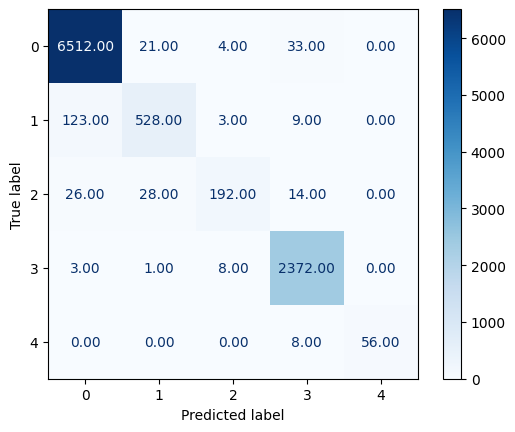

In [199]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_full, y_full_pred, labels=[0, 1, 2, 3, 4])

# Calculate percentages
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentage):")
print(np.round(conf_matrix_percent, 2))

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4])
disp.plot(cmap="Blues", values_format=".2f")

In [184]:
# Make predictions on the entire dataset
all_predictions = rf_model.predict(merged_data.drop(columns=['Month 13', 'LOAN_SEQUENCE_NUMBER']))

# Count the occurrences of each predicted value
prediction_counts = pd.Series(all_predictions).value_counts()

# Calculate percentages
prediction_percentages = (prediction_counts / prediction_counts.sum()) * 100

# Create a matrix with both numeric counts and percentages
prediction_matrix = pd.DataFrame({
    'Count': prediction_counts,
    'Percentage (%)': prediction_percentages
})

# Add missing categories (if any) to ensure 0, 1, 2, 3, 4 are included
for value in range(5):
    if value not in prediction_matrix.index:
        prediction_matrix.loc[value] = {'Count': 0, 'Percentage (%)': 0}

# Sort the matrix index
prediction_matrix.sort_index(inplace=True)

# Display the prediction matrix
print("Prediction Matrix:")
print(prediction_matrix)


Prediction Matrix:
     Count  Percentage (%)
0.0   6664       67.035510
1.0    578        5.814304
2.0    207        2.082285
3.0   2436       24.504577
4.0     56        0.563324


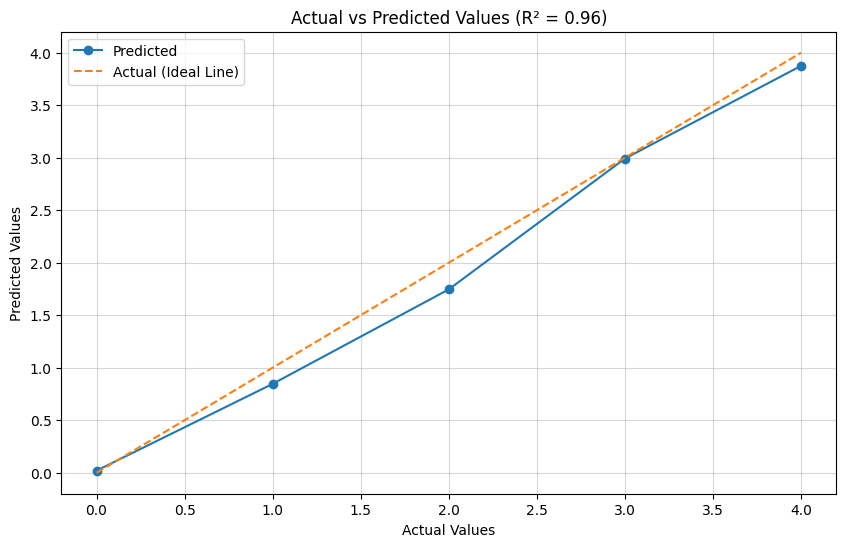

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt # type: ignore
import pandas as pd

# Calculate the R-squared value
r2 = r2_score(y_actual, y_pred_all)

# Create a DataFrame to hold actual and predicted values for plotting
plot_data = pd.DataFrame({
    'Actual': y_actual,
    'Predicted': y_pred_all
}).groupby('Actual').mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(plot_data['Actual'], plot_data['Predicted'], marker='o', label='Predicted')
plt.plot(plot_data['Actual'], plot_data['Actual'], linestyle='--', label='Actual (Ideal Line)')
plt.title(f"Actual vs Predicted Values (R² = {r2:.2f})")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [211]:
# Function to retrieve the predicted value for a specific loan sequence number
def get_prediction(loan_sequence_number, merged_data, predictions):
    # Ensure Loan Sequence Number exists in the DataFrame
    if loan_sequence_number in merged_data['LOAN_SEQUENCE_NUMBER'].values:
        # Find the index of the loan sequence number
        index = merged_data[merged_data['LOAN_SEQUENCE_NUMBER'] == loan_sequence_number].index[0]
        # Retrieve the predicted value using the index
        predicted_value = predictions[index]
        return predicted_value
    else:
        return "Loan Sequence Number not found in the dataset."

# Example usage
loan_sequence_number = "F02Q10130605"  # Replace with the actual loan sequence number
predicted_value = get_prediction(loan_sequence_number, merged_data, y_pred_all)
print(f"Predicted value for Loan Sequence Number {loan_sequence_number}: {predicted_value}")


Predicted value for Loan Sequence Number F02Q10130605: 3.0


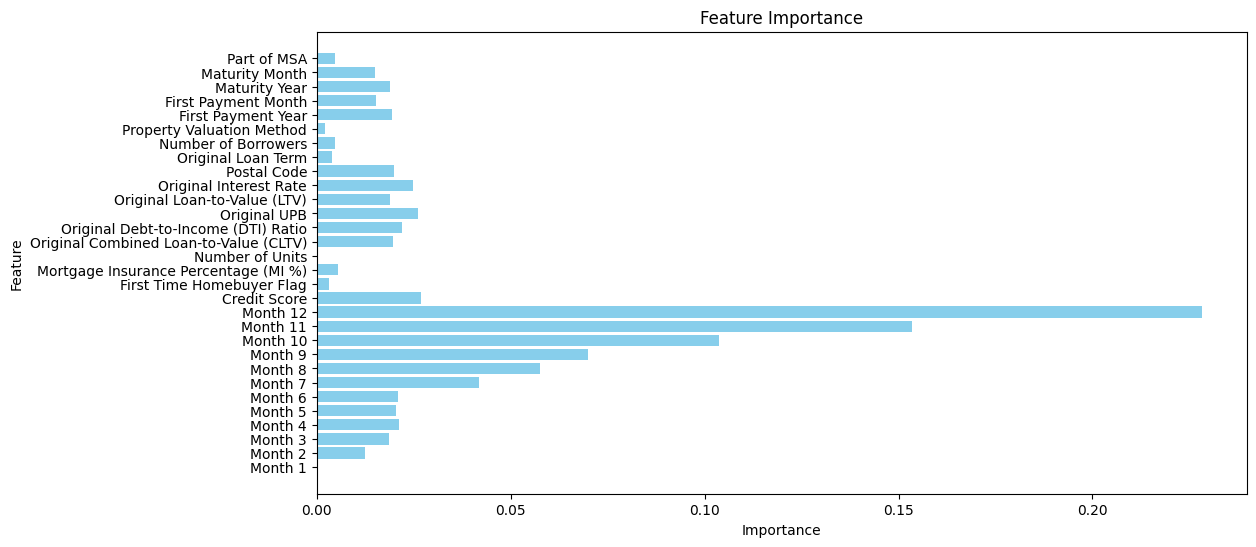

In [213]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = merged_data.drop(columns=['Month 13', 'LOAN_SEQUENCE_NUMBER']).columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
